<a href="https://www.kaggle.com/code/hilalalpak/forecasting-e-commerce-transaction-trends-iyzico?scriptVersionId=195611800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align:center; font-size:32px; border: 5px solid #1F6F8B; border-radius: 5px; padding: 6px; margin-bottom: 10px; background-color:#F5F5F5 ; font-family: Montserrat ; font-weight: bold; color: #1F6F8B;">Iyzico: Transaction Volume Forecasting for E-commerce Merchants
</div>

<div style="position: relative; display: inline-block; text-align: left; margin-bottom: 10px; width: 100%;">
    <div style="border: 2px solid #333333; border-radius: 10px; padding: 30px; margin-bottom: 10px; background-color: #E6E6E6; position: relative; padding-right: 30px;">
        <blockquote style="border-left: 5px solid #005A9C; padding-left: 10px;">
            <p style="font-weight: bold; color: #404040; margin: 0; font-size: 150%; font-family: Roboto">Data Information Overview</p>
        </blockquote>
        <div style="margin-bottom: 10px;">
            <p style="color: #404040; font-size: 130%; font-weight: bold; font-family: Roboto; margin-top: 5px;">
                Iyzico is a financial technology company that facilitates online shopping experiences for both buyers and sellers. The company provides a secure payment infrastructure for e-commerce companies, marketplaces, and individual users. The task involves forecasting the total transaction volume by merchant_id and on a daily basis for the last three months of 2020.
            </p>
            <div style="display: flex; gap: 20px; margin-bottom: 10px;">
                <div style="position: relative; display: inline-block; text-align: left; flex: 1; width: 100%;">
                    <div style="border: 0px solid #F5F5F5; border-radius: 5px; padding: 12px; margin-bottom: 0; background-color: #1F6F8B; position: relative; height: 100%;">
                        <blockquote style="border-left: 5px solid #F2F2F2; padding-left: 10px;">
                            <p style="font-weight: bold; color: #ffffff; margin: 0; font-size: 150%; font-family: Roboto">Dataset Details</p>
                        </blockquote>
                        <div style="margin-bottom: 10px;">
                            <p style="font-weight: bold; color: #F2F2F2; margin: 0; font-size: 130%; font-family: Roboto">
                                The dataset includes data from 2018 to 2020 for a total of 7 merchants across 7 different categories. It consists of 7667 observations and is approximately 612 KB in size. The dataset contains the following 4 key variables:
                            </p>
                            <div style="margin-bottom: 10px;">
                                <span style="font-weight: bold; color: #E6E6E6; font-family: Roboto; font-size: 130%">- transaction_date: </span>
                                <span style="color: #F5F5F5; font-family: Roboto; font-size: 130%">The dates on which sales transactions occurred.</span>
                            </div>
                            <div style="margin-bottom: 10px;">
                                <span style="font-weight: bold; color: #E6E6E6; font-family: Roboto; font-size: 130%">- merchant_id: </span>
                                <span style="color: #F5F5F5; font-family: Roboto; font-size: 130%">Unique identifiers assigned to each merchant.</span>
                            </div>
                            <div style="margin-bottom: 10px;">
                                <span style="font-weight: bold; color: #E6E6E6; font-family: Roboto; font-size: 130%">- Total_Transaction: </span>
                                <span style="color: #F5F5F5; font-family: Roboto; font-size: 130%">The total number of transactions occurring each day.</span>
                            </div>
                            <div style="margin-bottom: 10px;">
                                <span style="font-weight: bold; color: #E6E6E6; font-family: Roboto; font-size: 130%">- Total_Paid: </span>
                                <span style="color: #F5F5F5; font-family: Roboto; font-size: 130%">The total payment amount generated from sales.</span>
                            </div>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</div>


In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

# Adjusting Row Column Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read data
df = pd.read_csv("/kaggle/input/iyzico-payment-transaction-fraud-data/iyzico_data.csv", index_col=0)

<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">Overview
</div>

In [3]:
df.head(10)
df.tail(10)

,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,2018-01-01,535,349,25883.226
1,2018-01-01,42616,141,40918.860
2,2018-01-01,46774,410,306902.700
3,2018-01-01,86302,10,11.340
4,2018-01-01,124381,285,111383.766
5,2018-01-01,129316,5,15.750
6,2018-01-02,535,729,60263.928
7,2018-01-02,42616,162,48332.772
8,2018-01-02,46774,1708,1431591.822
9,2018-01-02,86302,83,144.774


,transaction_date,merchant_id,Total_Transaction,Total_Paid
7657,2020-12-30,86302,3181,11187.792
7658,2020-12-30,124381,2705,1799706.888
7659,2020-12-30,129316,642,2890.350
7660,2020-12-31,535,838,96505.200
7661,2020-12-31,42616,650,293856.282
7662,2020-12-31,46774,3394,3174751.332
7663,2020-12-31,57192,856,337696.020
7664,2020-12-31,86302,2657,10461.006
7665,2020-12-31,124381,3668,2445655.950
7666,2020-12-31,129316,485,2101.050


In [4]:
# Rename
df = df.rename(columns={"transaction_date": "Transaction_Date",
                       "merchant_id": "Merchant_ID"})

In [5]:
def check_df(dataframe, head=5):
    print("SHAPE".center(70,"-"))
    print(dataframe.shape)
    print("INFO".center(70,"-"))
    print(dataframe.info())
    print("MEMORY USAGE".center(70,"-"))
    print(f"{dataframe.memory_usage().sum() / (1024**2):.2f} MB")
    print("NUNIQUE".center(70,"-"))
    print(dataframe.nunique())
    print("MISSING VALUES".center(70,"-"))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70,"-"))
    print(dataframe.duplicated().sum())
    
    
check_df(df)

--------------------------------SHAPE---------------------------------
(7667, 4)
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 7667 entries, 0 to 7666
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Date   7667 non-null   object 
 1   Merchant_ID        7667 non-null   int64  
 2   Total_Transaction  7667 non-null   int64  
 3   Total_Paid         7667 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 299.5+ KB
None
-----------------------------MEMORY USAGE-----------------------------
0.29 MB
-------------------------------NUNIQUE--------------------------------
Transaction_Date     1096
Merchant_ID             7
Total_Transaction    2535
Total_Paid           7644
dtype: int64
----------------------------MISSING VALUES----------------------------
Transaction_Date     0
Merchant_ID          0
Total_

In [6]:
# Astype
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
df["Merchant_ID"] = df["Merchant_ID"].astype("category")

In [7]:
df["Transaction_Date"].min()
df["Transaction_Date"].max()

Timestamp('2018-01-01 00:00:00')

Timestamp('2020-12-31 00:00:00')

In [8]:
percentiles = [0.10, 0.25, 0.30, 0.40, 0.60, 0.70, 0.80, 0.85, 0.90, 0.95, 0.99]
df.describe(percentiles=percentiles).T

,count,mean,min,10%,25%,30%,40%,50%,60%,70%,80%,85%,90%,95%,99%,max,std
Transaction_Date,7667,2019-07-02 20:31:42.595539200,2018-01-01 00:00:00,2018-04-21 00:00:00,2018-10-02 00:00:00,2018-11-26 00:00:00,2019-03-15 00:00:00,2019-07-03 00:00:00,2019-10-20 00:00:00,2020-02-07 00:00:00,2020-05-26 00:00:00,2020-07-20 00:00:00,2020-09-13 00:00:00,2020-11-07 00:00:00,2020-12-20 08:09:36,2020-12-31 00:00:00,NaN
Total_Transaction,7667.000,1094.464,1.000,171.000,433.000,503.000,651.000,815.000,981.000,1182.000,1502.000,1797.000,2209.800,2930.100,6329.800,34617.000,1294.123
Total_Paid,7667.000,464176.414,9.000,483.325,3278.475,64987.812,125408.016,186434.532,257107.270,360793.796,553207.097,860916.204,1334450.344,2053261.859,4008707.003,12113121.618,844857.916


In [9]:
df.Merchant_ID.unique()

[535, 42616, 46774, 86302, 124381, 129316, 57192]
Categories (7, int64): [535, 42616, 46774, 57192, 86302, 124381, 129316]

<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">Visual Analysis
</div>

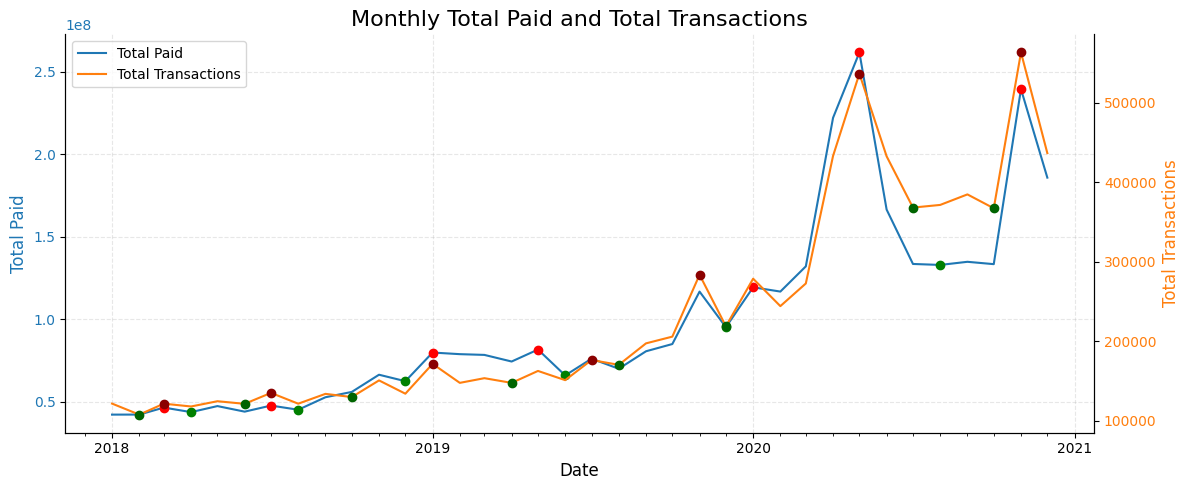

In [10]:
import matplotlib.dates as mdates
from scipy.signal import find_peaks

# Data preparation
monthly_totals = df.groupby(df['Transaction_Date'].dt.to_period('M')).agg({
    'Total_Paid': 'sum',
    'Total_Transaction': 'sum'
}).reset_index()
monthly_totals['Transaction_Date'] = monthly_totals['Transaction_Date'].dt.to_timestamp()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 5))

# Total Paid
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Paid', color=color, fontsize=12)
ax1.plot(monthly_totals['Transaction_Date'], monthly_totals['Total_Paid'], color=color, label='Total Paid')
ax1.tick_params(axis='y', labelcolor=color)

# Find peaks and troughs for Total Paid
peaks, _ = find_peaks(monthly_totals['Total_Paid'], distance=3)
troughs, _ = find_peaks(-monthly_totals['Total_Paid'], distance=3)

ax1.plot(monthly_totals['Transaction_Date'].iloc[peaks], monthly_totals['Total_Paid'].iloc[peaks], "o", color='red')
ax1.plot(monthly_totals['Transaction_Date'].iloc[troughs], monthly_totals['Total_Paid'].iloc[troughs], "o", color='green')

# Total Transactions
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Transactions', color=color, fontsize=12)
ax2.plot(monthly_totals['Transaction_Date'], monthly_totals['Total_Transaction'], color=color, label='Total Transactions')
ax2.tick_params(axis='y', labelcolor=color)

# Find peaks and troughs for Total Transactions
peaks_trans, _ = find_peaks(monthly_totals['Total_Transaction'], distance=3)
troughs_trans, _ = find_peaks(-monthly_totals['Total_Transaction'], distance=3)

ax2.plot(monthly_totals['Transaction_Date'].iloc[peaks_trans], monthly_totals['Total_Transaction'].iloc[peaks_trans], "o", color='darkred')
ax2.plot(monthly_totals['Transaction_Date'].iloc[troughs_trans], monthly_totals['Total_Transaction'].iloc[troughs_trans], "o", color='darkgreen')

# General plot settings
plt.title('Monthly Total Paid and Total Transactions', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# X-axis settings
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show();

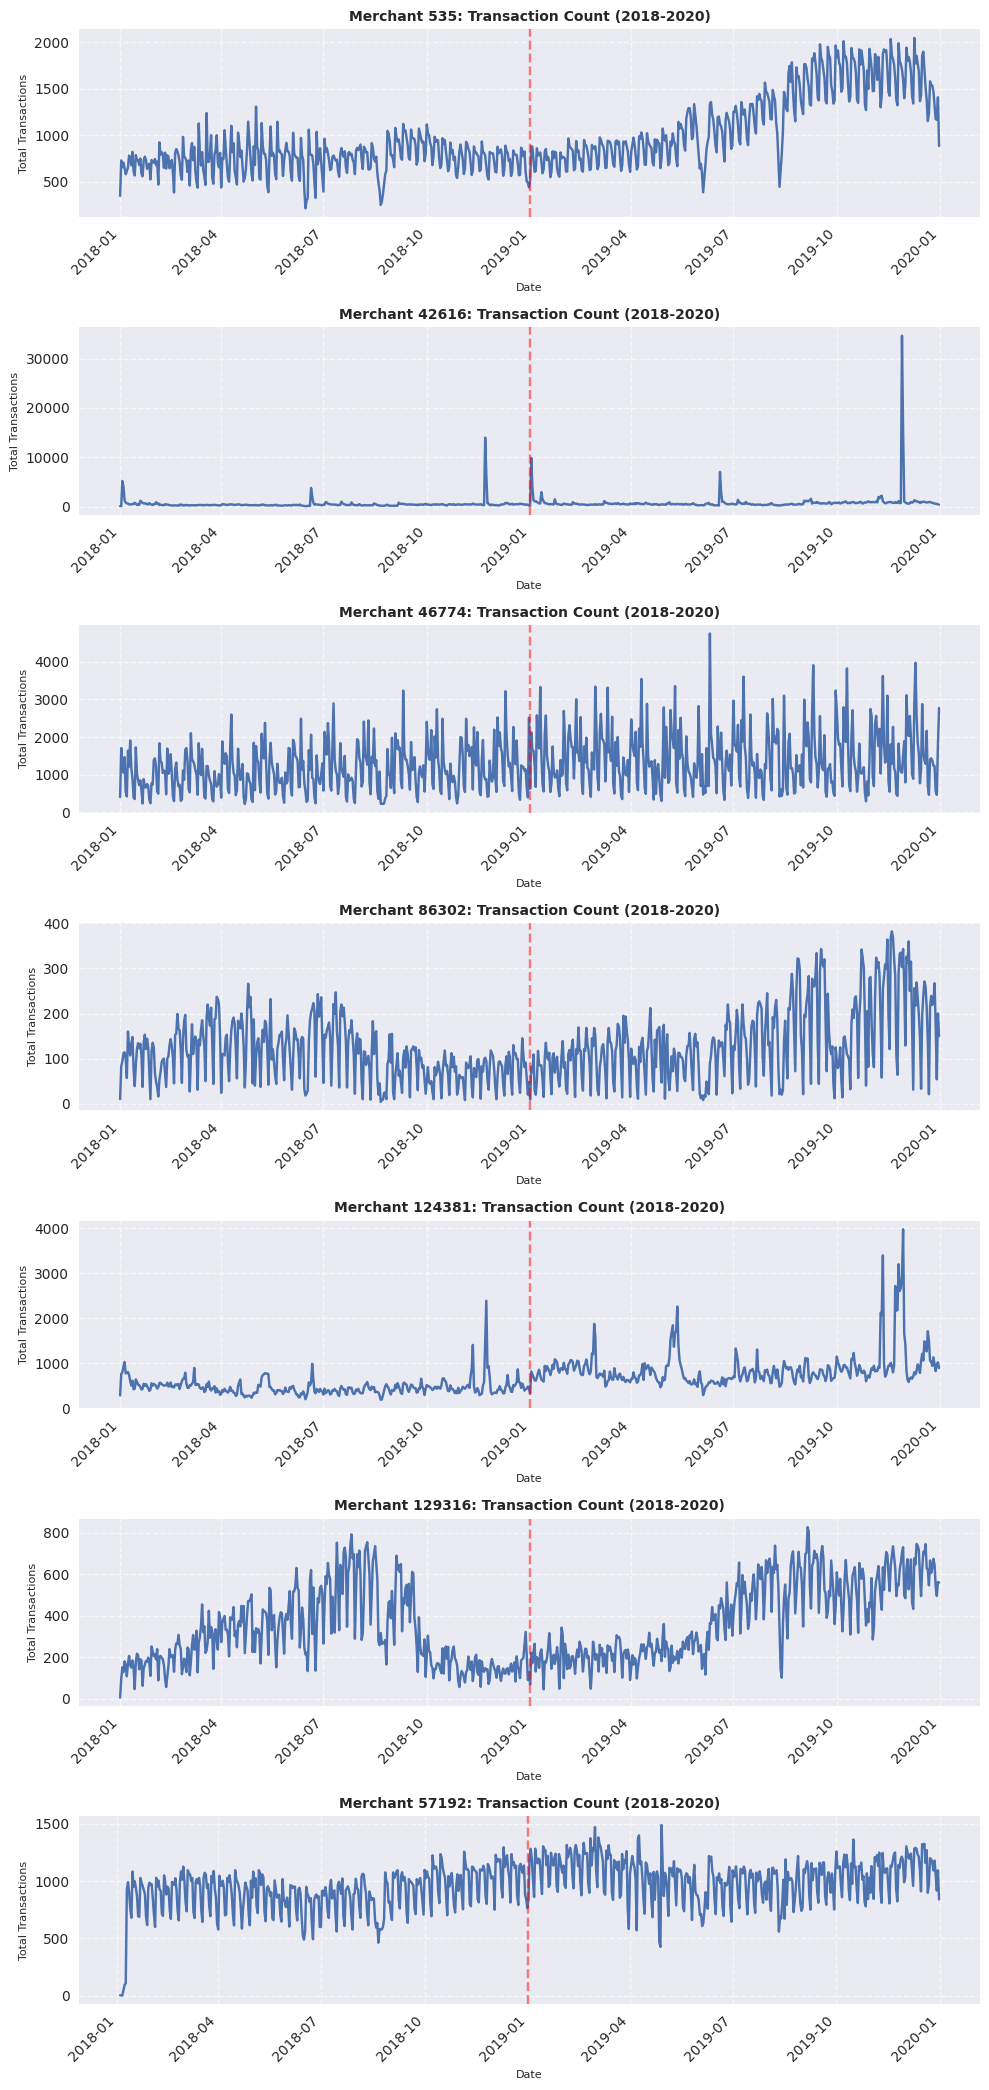

In [11]:
import math

# Set the style for better-looking plots
plt.style.use('seaborn')
sns.set_palette("deep")

merchant_ids = df.Merchant_ID.unique()
total_plots = len(merchant_ids)
num_cols = 1
num_rows = math.ceil(total_plots / num_cols)

# Figure size
fig = plt.figure(figsize=(10, 3 * num_rows))

for idx, merchant_id in enumerate(merchant_ids):
    # 2018-2020 graphic
    ax = fig.add_subplot(num_rows, num_cols, idx + 1)
    
    # Filter data for the specific merchant and date range
    merchant_data = df[(df.Merchant_ID == merchant_id) & 
                       (df.Transaction_Date >= "2018-01-01") & 
                       (df.Transaction_Date < "2020-01-01")]
    
    # Plot the data
    sns.lineplot(data=merchant_data, x='Transaction_Date', y='Total_Transaction', ax=ax)
    
    # Customize the plot
    ax.set_title(f'Merchant {merchant_id}: Transaction Count (2018-2020)', fontsize=10, fontweight='bold')
    ax.set_xlabel('Date', fontsize=8)
    ax.set_ylabel('Total Transactions', fontsize=8)
    
    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add grid for easier reading
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Highlight year change
    ax.axvline(pd.to_datetime('2019-01-01'), color='r', linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime('2019-01-01'), ax.get_ylim()[1], ' ', 
            horizontalalignment='center', verticalalignment='bottom', color='r')

    # Add some padding to the layout
    ax.margins(x=0.05)


plt.tight_layout()
plt.show();

<div style="background-color:#ffffff; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #4B4B4B; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #4B4B4B;">Merchant 535:
Overall, it shows an increasing trend. There is a noticeable rise starting from mid-2019.
A sharp decline is observed at the beginning of 2020.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #333333;">Merchant 42616:
It exhibits a very irregular pattern. Mostly low transaction numbers, but occasionally very high peaks.
These peaks may be related to special promotions or sales events.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #4B4B4B; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #4B4B4B;">Merchant 46774:
It shows a highly volatile structure. There is a clear seasonal pattern, possibly with weekly or monthly cycles.
A general upward trend in transaction numbers is observed starting from mid-2019.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #333333;">Merchant 86302:
Relatively stable from 2018 to mid-2019. From mid-2019 onwards, there is a noticeable upward trend.
A small decline is seen at the beginning of 2020, but it rises again afterward.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #4B4B4B; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #4B4B4B;">Merchant 124381:
Overall, it exhibits a fluctuating pattern.
There is an increase in transaction numbers toward the end of 2019.
A very high peak is observed at the beginning of 2020, followed by a sharp decline.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #333333;">Merchant 129316:
High transaction numbers in the first half of 2018, followed by a decline.
An upward trend begins again from mid-2019. A sharp decline is observed at the start of 2020.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #4B4B4B; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-weight: bold;font-family:Montserrat; letter-spacing: 1px; color: #4B4B4B;">Merchant 57192:
It generally shows a stable structure. There are regular weekly or monthly cycles.
A slight upward trend in transaction numbers is seen after mid-2019.</p>
    </blockquote>
</div> 

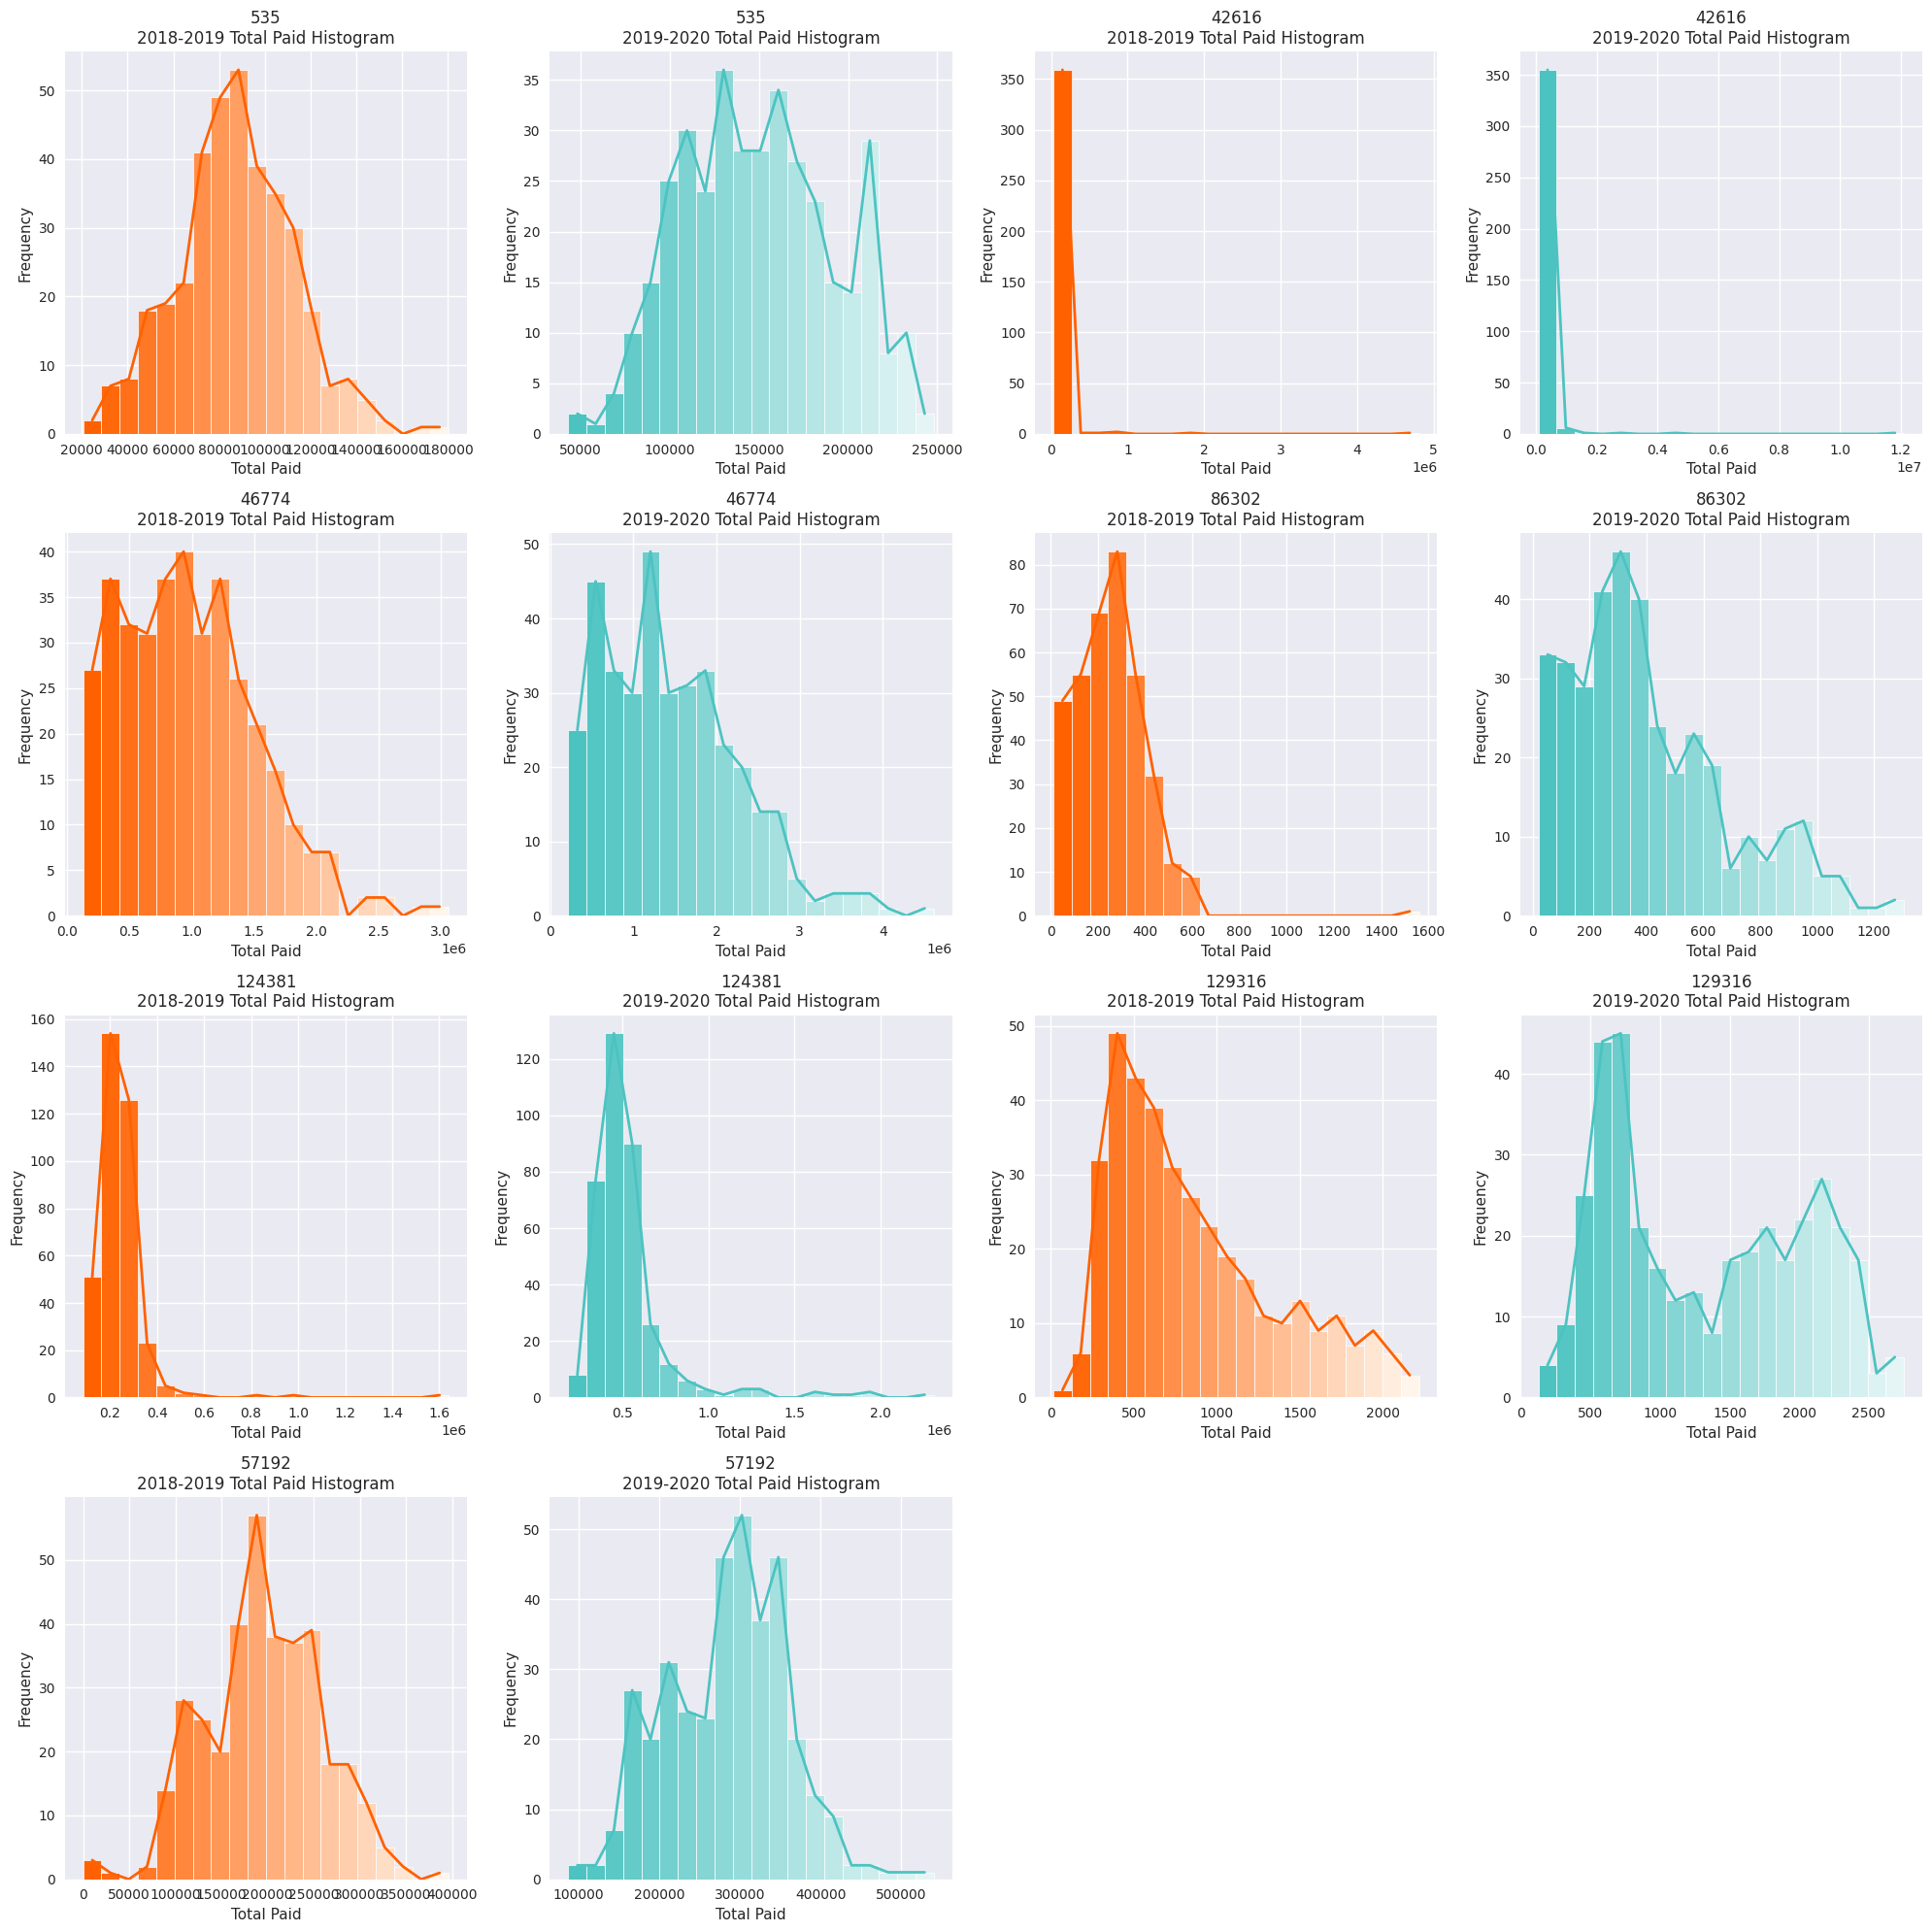

In [12]:
from matplotlib.colors import LinearSegmentedColormap

iyzico_orange = '#ff6100'
iyzico_blue = '#4cc3c1'

# Custom colormaps with reverse transition (dark to light)
orange_cmap = LinearSegmentedColormap.from_list("", [iyzico_orange, "#fff5eb"])
blue_cmap = LinearSegmentedColormap.from_list("", [iyzico_blue, "#e5f5f5"])

# Get all unique Merchant IDs
merchant_ids = df.Merchant_ID.unique()

# Calculate the total number of plots
total_plots = len(merchant_ids) * 2

# Calculate the number of rows and columns
num_cols = 4
num_rows = math.ceil(total_plots / num_cols)

# Create a large figure
fig = plt.figure(figsize=(20, 5 * num_rows))

for idx, merchant_id in enumerate(merchant_ids):
    # 2018-2019 Total Paid Histogram
    ax1 = fig.add_subplot(num_rows, num_cols, idx * 2 + 1)
    data_2018_2019 = df[(df.Merchant_ID == merchant_id) & 
                        (df.Transaction_Date >= "2018-01-01") & 
                        (df.Transaction_Date < "2019-01-01")]["Total_Paid"]
    
    n, bins, patches = ax1.hist(data_2018_2019, bins=20, edgecolor='white', linewidth=0.5)
    
    # Apply color transitions
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', orange_cmap(c))
    
    # Add a line plot
    ax1.plot(bin_centers, n, color=iyzico_orange, linewidth=2)
    
    ax1.set_title(f'{merchant_id}\n2018-2019 Total Paid Histogram')
    ax1.set_xlabel('Total Paid')
    ax1.set_ylabel('Frequency')
    
    # 2019-2020 Total Paid Histogram
    ax2 = fig.add_subplot(num_rows, num_cols, idx * 2 + 2)
    data_2019_2020 = df[(df.Merchant_ID == merchant_id) & 
                        (df.Transaction_Date >= "2019-01-01") & 
                        (df.Transaction_Date < "2020-01-01")]["Total_Paid"]
    
    n, bins, patches = ax2.hist(data_2019_2020, bins=20, edgecolor='white', linewidth=0.5)
    
    # Apply color transitions
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', blue_cmap(c))
    
    # Add a line plot
    ax2.plot(bin_centers, n, color=iyzico_blue, linewidth=2)
    
    ax2.set_title(f'{merchant_id}\n2019-2020 Total Paid Histogram')
    ax2.set_xlabel('Total Paid')
    ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show();

<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">Feature Extraction
</div>

In [13]:
def create_date_features(df, date_column, add_lag_features=False, holidays=None):
    """
    Create date features from a date column in a DataFrame.
    
    Args:
    df (pd.DataFrame): Input DataFrame
    date_column (str): Name of the date column
    add_lag_features (bool): Whether to add lag features
    holidays (list): List of holiday dates (optional)
    
    Returns:
    pd.DataFrame: DataFrame with new date features
    """
    
    if date_column not in df.columns:
        raise ValueError(f"Column '{date_column}' not found in DataFrame")
    
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        try:
            df[date_column] = pd.to_datetime(df[date_column])
        except:
            raise ValueError(f"Column '{date_column}' could not be converted to datetime")

    # Basic date features
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day_of_month'] = df[date_column].dt.day
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['week_of_year'] = df[date_column].dt.isocalendar().week
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    # Month start/end features
    df['is_month_start'] = df[date_column].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
    
    # Quarter features
    df['quarter'] = df[date_column].dt.quarter
    df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)
    
    # Year start/end features
    df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
    df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)
    
    # Season (Northern Hemisphere)
    df['season'] = df['month'].map({12:1, 1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4})
    
    # Cyclical features
    df['month_sin'] = np.sin(df['month'] * (2 * np.pi / 12))
    df['month_cos'] = np.cos(df['month'] * (2 * np.pi / 12))
    df['day_sin'] = np.sin(df['day_of_month'] * (2 * np.pi / 31))
    df['day_cos'] = np.cos(df['day_of_month'] * (2 * np.pi / 31))
    
    return df

df = create_date_features(df, 'Transaction_Date', holidays=['2023-01-01', '2023-12-25'])

In [14]:
### I analyze the lag values before selecting the most meaningful ones for the application.

lagss = [91, 92, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
         350, 351, 352, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,
         538, 539, 540, 541, 542, 718, 719, 720, 721, 722]

<div style="background-color:#808080; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #F5F5F5; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: white;">I aim to enhance my modeling processes by adding lagged features containing historical sales data to the dataframe. This allows to better represent time series data, capturing past patterns and trends that can improve the accuracy and performance of my models.</p>
    </blockquote>
</div>

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF & PACF
def compute_acf_pacf(series, lags):
    acf_values = acf(series, nlags=max(lags))
    pacf_values = pacf(series, nlags=max(lags))
    return acf_values, pacf_values

def get_lag_importance(acf_values, pacf_values, lags):
    acf_df = pd.DataFrame({
        'Lag': lags,
        'ACF': [acf_values[lag] if lag < len(acf_values) else None for lag in lags],
        'PACF': [pacf_values[lag] if lag < len(pacf_values) else None for lag in lags]
    })
    acf_df = acf_df.dropna()
    return acf_df.sort_values(by='ACF', ascending=False), acf_df.sort_values(by='PACF', ascending=False)



acf_values, pacf_values = compute_acf_pacf(df['Total_Transaction'], lagss)

# Lag importances
acf_sorted, pacf_sorted = get_lag_importance(acf_values, pacf_values, lagss)

print("Top lag values based on ACF:")
print(acf_sorted.head(20))  # Most imp. 10 lag 

print("\nTop lag values based on PACF:")
print(pacf_sorted.head(20)) 

Top lag values based on ACF:
    Lag   ACF   PACF
0    91 0.585  0.052
7   175 0.522  0.005
21  189 0.514  0.019
14  182 0.511 -0.011
23  350 0.383 -0.002
29  357 0.373  0.010
36  364 0.369  0.002
44  539 0.333  0.025
51  721 0.265 -0.026
32  360 0.175  0.004
3   171 0.174 -0.019
17  185 0.174 -0.010
10  178 0.174 -0.010
39  367 0.169 -0.009
4   172 0.153 -0.001
11  179 0.153  0.012
47  542 0.149 -0.015
18  186 0.147 -0.017
20  188 0.140  0.020
43  538 0.132  0.017

Top lag values based on PACF:
    Lag   ACF  PACF
0    91 0.585 0.052
44  539 0.333 0.025
20  188 0.140 0.020
21  189 0.514 0.019
43  538 0.132 0.017
52  722 0.055 0.015
19  187 0.107 0.013
11  179 0.153 0.012
29  357 0.373 0.010
40  368 0.106 0.009
1    92 0.112 0.007
22  190 0.086 0.006
7   175 0.522 0.005
46  541 0.128 0.004
30  358 0.064 0.004
32  360 0.175 0.004
15  183 0.081 0.003
35  363 0.123 0.003
13  181 0.127 0.003
12  180 0.100 0.003


Analyzing Merchant ID: 535


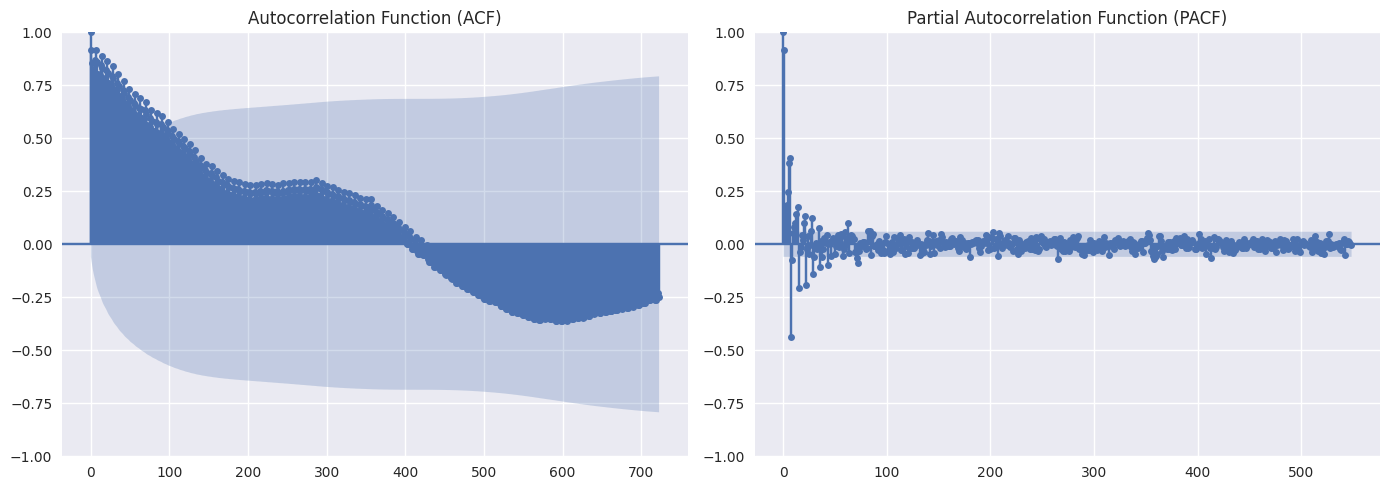

Analyzing Merchant ID: 42616


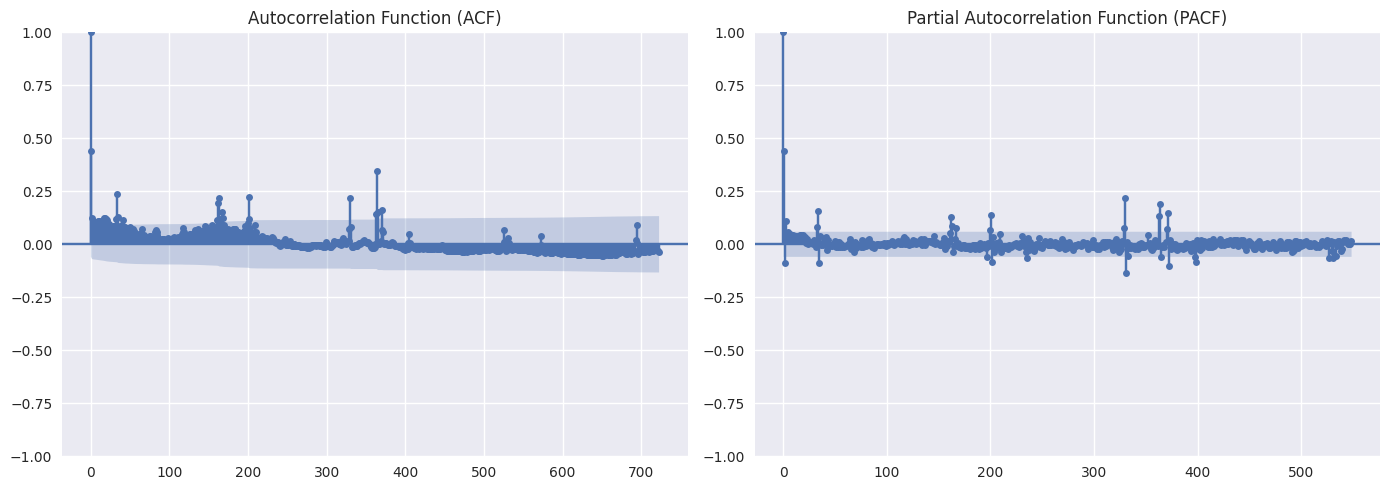

Analyzing Merchant ID: 46774


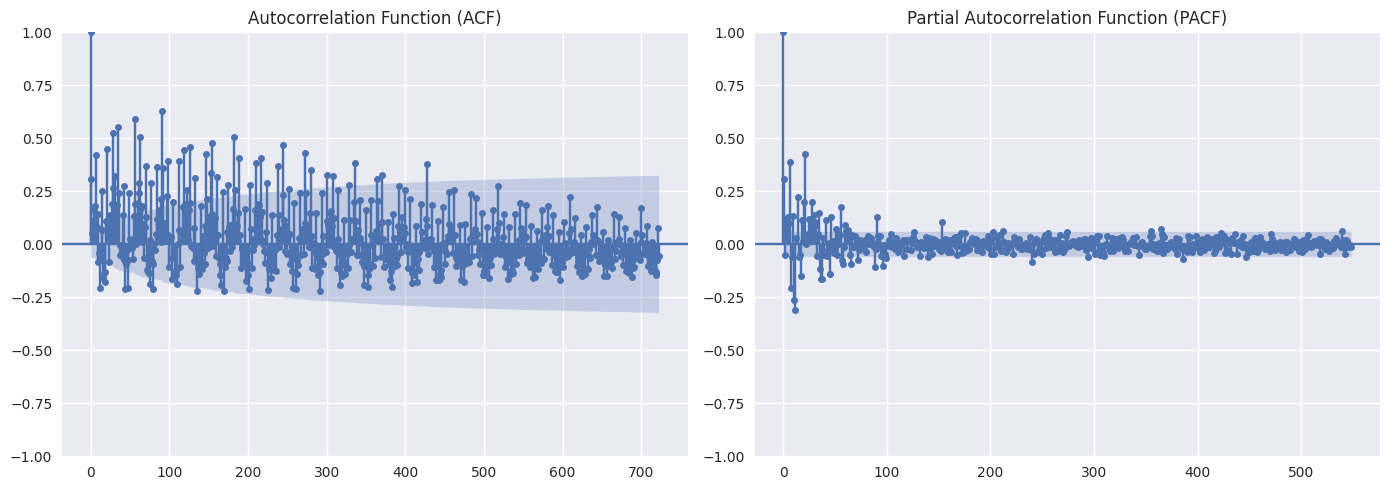

Analyzing Merchant ID: 86302


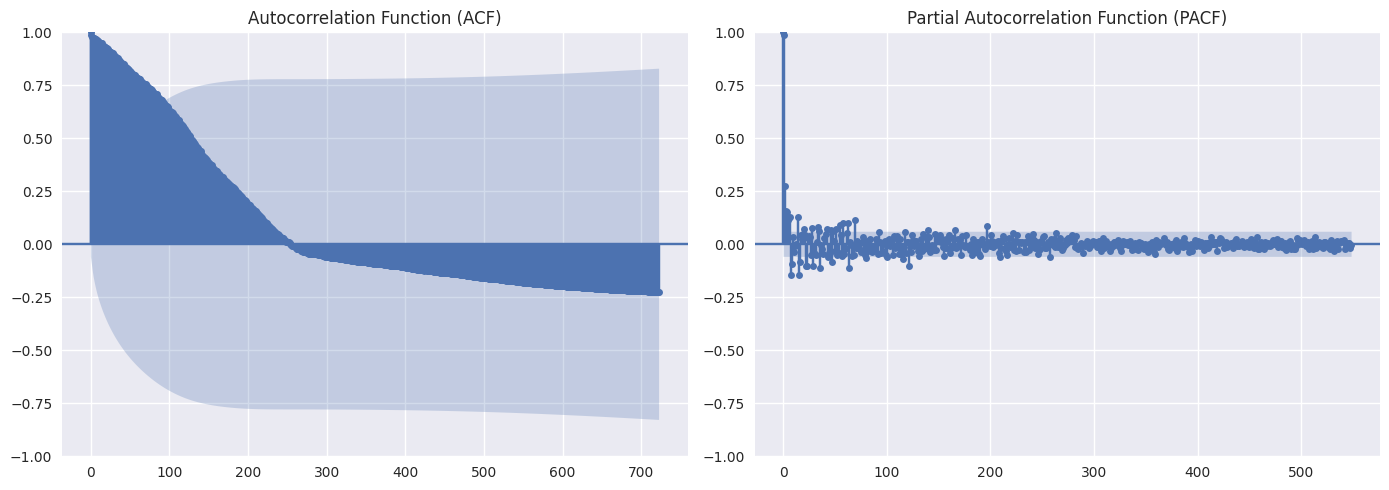

Analyzing Merchant ID: 124381


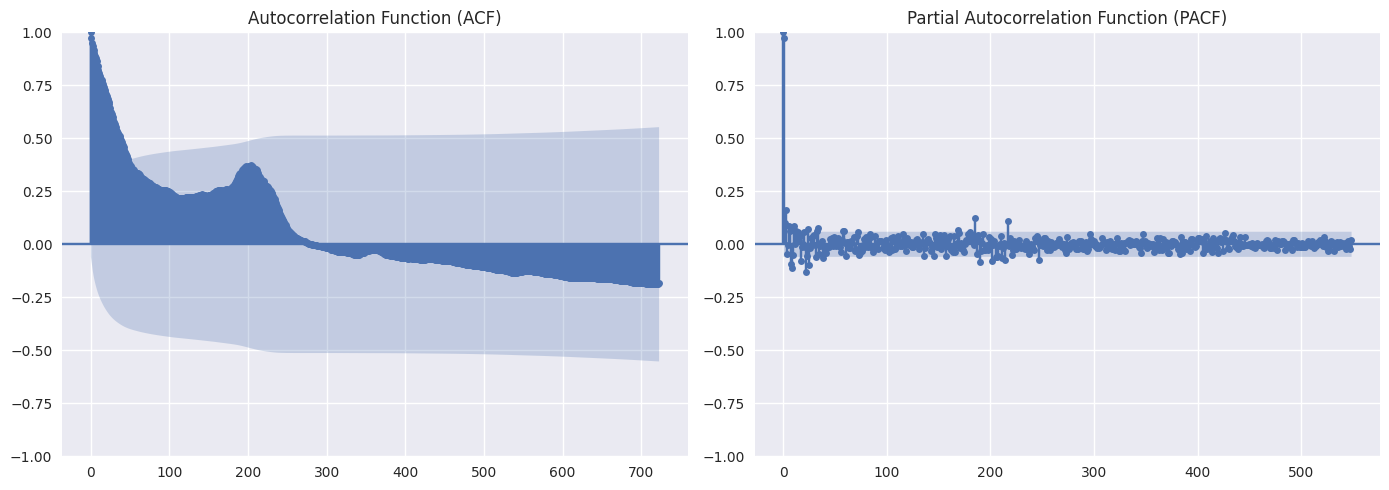

Analyzing Merchant ID: 129316


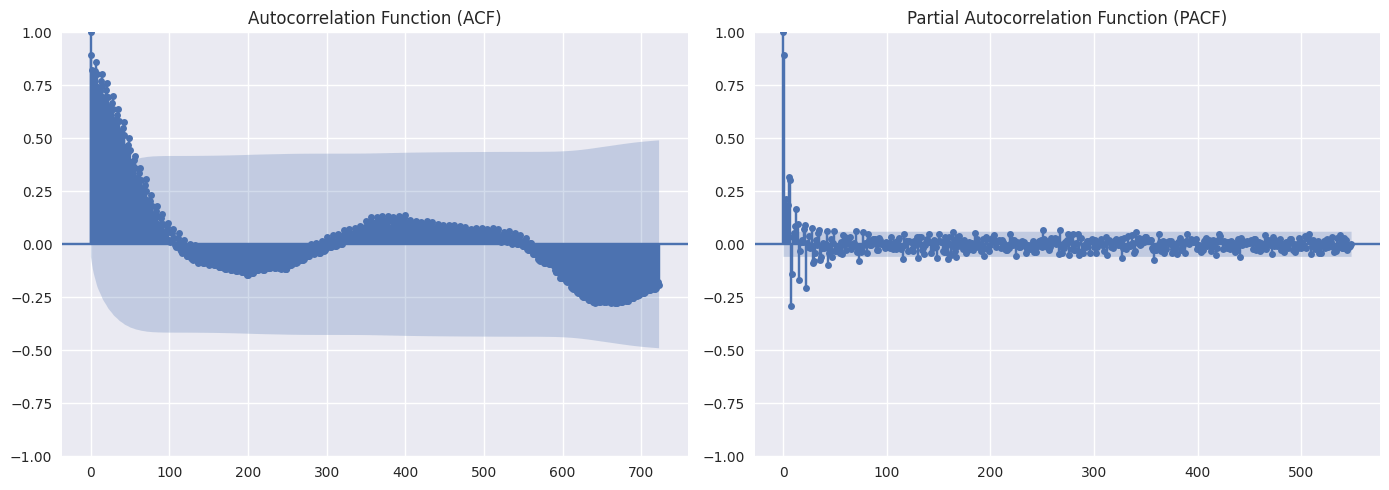

Analyzing Merchant ID: 57192


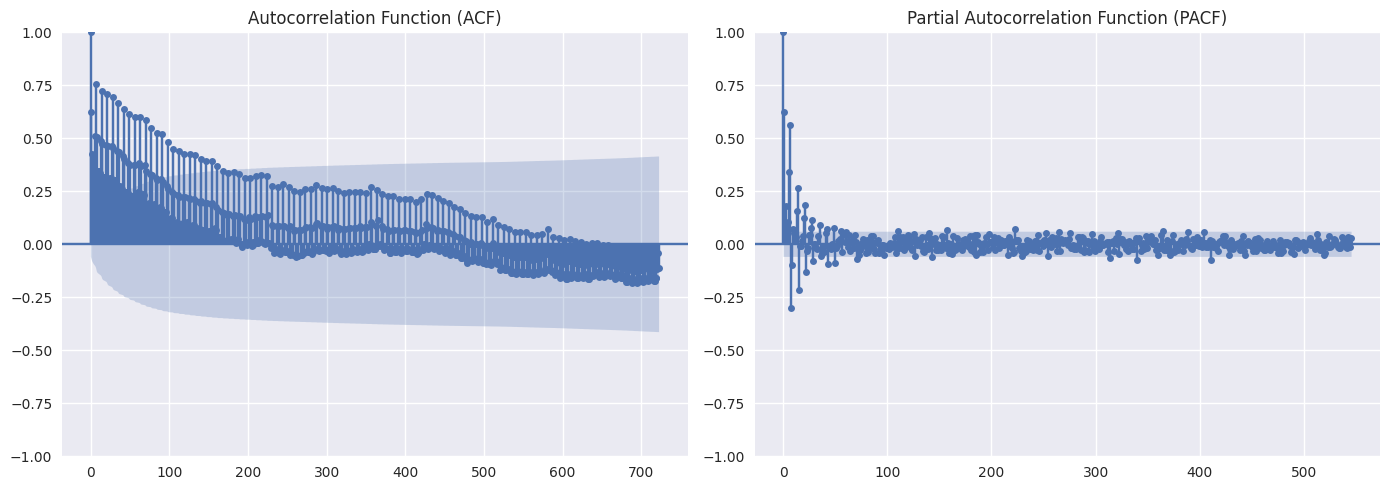

In [16]:
def plot_acf_pacf(series, lags):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # ACF
    plot_acf(series, lags=max(lags), ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)')
    
    # PACF 
    n = len(series)
    pacf_nlags = min(max(lags), n // 2)  
    plot_pacf(series, lags=pacf_nlags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)')
    
    plt.tight_layout()
    plt.show()


for merchant_id in df['Merchant_ID'].unique():
    merchant_data = df[df['Merchant_ID'] == merchant_id]['Total_Transaction']
    print(f"Analyzing Merchant ID: {merchant_id}")
    plot_acf_pacf(merchant_data, lagss)

<div style="background-color:#808080; border-radius: 20px; padding: 5px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: F5F5F5;">91: This value corresponds to 3 months and has the highest ACF value. It is one of the most important candidates for 3-month forecasting.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: F5F5F5;">175, 182, 189: These values are close to 3 months and have high ACF values. They may capture seasonality or regularly repeating patterns if present.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: F5F5F5;">188: Both ACF and PACF values are meaningful.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: F5F5F5;">350, 357, 364: These lags correspond to multiples of 3 months and suggest that there might be longer-term repetitions in your historical data.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #333333; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 16px; text-align: left; font-family:Montserrat; letter-spacing: 1px; color: F5F5F5;">539: Although it does not have a high ACF, its PACF value is significant. This may indicate an independent effect not explained by previous lags.</p>
    </blockquote>
</div> 

In [17]:
final_lags = [91, 175, 182, 188, 189, 350, 357, 364, 539]

# Random Noise
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))


# Lag/Shifted Features
def lag_features(dataframe, lags):
    for lag in lags:
        dataframe['sales_lag_' + str(lag)] = dataframe.groupby(["Merchant_ID"])['Total_Transaction'].transform(
            lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe

In [18]:
df = lag_features(df, lags=final_lags)

In [19]:
# Rolling Mean Features

def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby("Merchant_ID")['Total_Transaction']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe

df = roll_mean_features(df, [91,92,178,179,180,181,182,359,360,361,449,450,451,539,540,541,629,630,631,720])

In [20]:
# Exponentially Weighted Mean Features

def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby("Merchant_ID")['Total_Transaction'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [91,92,178,179,180,181,182,359,360,361,449,450,451,539,540,541,629,630,631,720]

df = ewm_features(df, alphas, lags)

In [21]:
# Black Friday - Summer Solstice

df["Black_Friday"] = 0
df.loc[df["Transaction_Date"].isin(["2018-11-22","2018-11-23","2019-11-29","2019-11-30"]) ,"Black_Friday"]=1

df["Summer_Solstice"] = 0
df.loc[df["Transaction_Date"].isin(["2018-06-19","2018-06-20","2018-06-21","2018-06-22",
                                    "2019-06-19","2019-06-20","2019-06-21","2019-06-22",]) ,"Summer_Solstice"]=1

<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">Preparation to Modelling
</div>

In [22]:
df.tail()

,Transaction_Date,Merchant_ID,Total_Transaction,Total_Paid,year,month,day_of_month,day_of_year,week_of_year,day_of_week,is_weekend,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,is_year_end,season,month_sin,month_cos,day_sin,day_cos,sales_lag_91,sales_lag_175,sales_lag_182,sales_lag_188,sales_lag_189,sales_lag_350,sales_lag_357,sales_lag_364,sales_lag_539,sales_roll_mean_91,sales_roll_mean_92,sales_roll_mean_178,sales_roll_mean_179,sales_roll_mean_180,sales_roll_mean_181,sales_roll_mean_182,sales_roll_mean_359,sales_roll_mean_360,sales_roll_mean_361,sales_roll_mean_449,sales_roll_mean_450,sales_roll_mean_451,sales_roll_mean_539,sales_roll_mean_540,sales_roll_mean_541,sales_roll_mean_629,sales_roll_mean_630,sales_roll_mean_631,sales_roll_mean_720,sales_ewm_alpha_095_lag_91,sales_ewm_alpha_095_lag_92,sales_ewm_alpha_095_lag_178,sales_ewm_alpha_095_lag_179,sales_ewm_alpha_095_lag_180,sales_ewm_alpha_095_lag_181,sales_ewm_alpha_095_lag_182,sales_ewm_alpha_095_lag_359,sales_ewm_alpha_095_lag_360,sales_ewm_alpha_095_lag_361,sales_ewm_alpha_095_lag_449,sales_ewm_alpha_095_lag_450,sales_ewm_alpha_095_lag_451,sales_ewm_alpha_095_lag_539,sales_ewm_alpha_095_lag_540,sales_ewm_alpha_095_lag_541,sales_ewm_alpha_095_lag_629,sales_ewm_alpha_095_lag_630,sales_ewm_alpha_095_lag_631,sales_ewm_alpha_095_lag_720,sales_ewm_alpha_09_lag_91,sales_ewm_alpha_09_lag_92,sales_ewm_alpha_09_lag_178,sales_ewm_alpha_09_lag_179,sales_ewm_alpha_09_lag_180,sales_ewm_alpha_09_lag_181,sales_ewm_alpha_09_lag_182,sales_ewm_alpha_09_lag_359,sales_ewm_alpha_09_lag_360,sales_ewm_alpha_09_lag_361,sales_ewm_alpha_09_lag_449,sales_ewm_alpha_09_lag_450,sales_ewm_alpha_09_lag_451,sales_ewm_alpha_09_lag_539,sales_ewm_alpha_09_lag_540,sales_ewm_alpha_09_lag_541,sales_ewm_alpha_09_lag_629,sales_ewm_alpha_09_lag_630,sales_ewm_alpha_09_lag_631,sales_ewm_alpha_09_lag_720,sales_ewm_alpha_08_lag_91,sales_ewm_alpha_08_lag_92,sales_ewm_alpha_08_lag_178,sales_ewm_alpha_08_lag_179,sales_ewm_alpha_08_lag_180,sales_ewm_alpha_08_lag_181,sales_ewm_alpha_08_lag_182,sales_ewm_alpha_08_lag_359,sales_ewm_alpha_08_lag_360,sales_ewm_alpha_08_lag_361,sales_ewm_alpha_08_lag_449,sales_ewm_alpha_08_lag_450,sales_ewm_alpha_08_lag_451,sales_ewm_alpha_08_lag_539,sales_ewm_alpha_08_lag_540,sales_ewm_alpha_08_lag_541,sales_ewm_alpha_08_lag_629,sales_ewm_alpha_08_lag_630,sales_ewm_alpha_08_lag_631,sales_ewm_alpha_08_lag_720,sales_ewm_alpha_07_lag_91,sales_ewm_alpha_07_lag_92,sales_ewm_alpha_07_lag_178,sales_ewm_alpha_07_lag_179,sales_ewm_alpha_07_lag_180,sales_ewm_alpha_07_lag_181,sales_ewm_alpha_07_lag_182,sales_ewm_alpha_07_lag_359,sales_ewm_alpha_07_lag_360,sales_ewm_alpha_07_lag_361,sales_ewm_alpha_07_lag_449,sales_ewm_alpha_07_lag_450,sales_ewm_alpha_07_lag_451,sales_ewm_alpha_07_lag_539,sales_ewm_alpha_07_lag_540,sales_ewm_alpha_07_lag_541,sales_ewm_alpha_07_lag_629,sales_ewm_alpha_07_lag_630,sales_ewm_alpha_07_lag_631,sales_ewm_alpha_07_lag_720,sales_ewm_alpha_05_lag_91,sales_ewm_alpha_05_lag_92,sales_ewm_alpha_05_lag_178,sales_ewm_alpha_05_lag_179,sales_ewm_alpha_05_lag_180,sales_ewm_alpha_05_lag_181,sales_ewm_alpha_05_lag_182,sales_ewm_alpha_05_lag_359,sales_ewm_alpha_05_lag_360,sales_ewm_alpha_05_lag_361,sales_ewm_alpha_05_lag_449,sales_ewm_alpha_05_lag_450,sales_ewm_alpha_05_lag_451,sales_ewm_alpha_05_lag_539,sales_ewm_alpha_05_lag_540,sales_ewm_alpha_05_lag_541,sales_ewm_alpha_05_lag_629,sales_ewm_alpha_05_lag_630,sales_ewm_alpha_05_lag_631,sales_ewm_alpha_05_lag_720,Black_Friday,Summer_Solstice
7662,2020-12-31,46774,3394,3174751.332,2020,12,31,366,53,3,0,0,1,4,0,1,0,1,1,-0.000,1.000,-0.000,1.000,2898.261,1868.668,2064.908,1221.033,1431.754,1766.077,2044.455,2719.034,1752.913,1967.217,1969.020,1845.282,1842.636,1840.287,1841.088,1839.694,1756.983,1758.948,1758.507,1738.117,1739.626,1741.357,1705.124,1708.819,1704.936,1665.446,1663.227,1662.677,1623.433,2920.865,3374.294,2881.603,1050.054,1070.073,2097.468,2087.355,2313.910,2882.206,1214.127,1880.263,2094.26

In [23]:
# One-Hot Encoding

df = pd.get_dummies(df, columns=['Merchant_ID','day_of_week', 'month'])
df['Total_Transaction'] = np.log1p(df["Total_Transaction"].values)

In [24]:
# Time-Based Validation Sets

import re

df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Until 10 months for 2020
train = df.loc[(df["Transaction_Date"] < "2020-10-01"), :]

# 3 months for 2020
val = df.loc[(df["Transaction_Date"] >= "2020-10-01"), :]

cols = [col for col in train.columns if col not in ['Transaction_Date', 'Merchant_ID', "Total_Transaction", "Total_Paid", "year" ]]

Y_train = train['Total_Transaction']
X_train = train[cols]

Y_val = val['Total_Transaction']
X_val = val[cols]

# check
Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((7023,), (7023, 173), (644,), (644, 173))

In [25]:
# Custom Cost Function

# MAPE: mean absolute percentage error
# sMAPE: Symmetric mean absolute percentage error (adjusted MAPE)


def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val

<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">XGBOOST
</div>

In [26]:
import xgboost as xgb

# XGBoost model parameters
xgb_params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'mae',  
    'learning_rate': 0.02, 
    'max_depth': 5,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'n_estimators': 1000  
}

# Create XGBoost DMatrix for training and validation
dtrain = xgb.DMatrix(data=X_train, label=Y_train, feature_names=cols)
dval = xgb.DMatrix(data=X_val, label=Y_val, feature_names=cols)

# SMAPE evaluation function
def xgb_smape(preds, dtrain):
    labels = dtrain.get_label()
    # Calculate SMAPE
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'smape', smape_val

# Train the XGBoost model
model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=xgb_params['n_estimators'],
    evals=[(dval, 'eval')],
    feval=xgb_smape,
    early_stopping_rounds=200,
    verbose_eval=100
)

# Predict on validation set using the best iteration
y_pred_val = model.predict(dval, iteration_range=(0, model.best_iteration))

# Compute SMAPE value
smape_value = smape(np.expm1(y_pred_val), np.expm1(Y_val))
print(f'SMAPE: {smape_value}')

[0]	eval-mae:0.94781	eval-smape:81.91508
[100]	eval-mae:0.27228	eval-smape:25.95978
[200]	eval-mae:0.22733	eval-smape:21.90708
[300]	eval-mae:0.22331	eval-smape:21.60741
[400]	eval-mae:0.22752	eval-smape:22.04208
[466]	eval-mae:0.23368	eval-smape:22.65837
SMAPE: 21.513370911586104


<div style="text-align:center; font-size:26px; border: 2px solid #F5F5F5; border-radius: 5px; padding: 4px; margin-bottom: 10px; background-color:#1F6F8B ; font-family: Montserrat ;  color: #F5F5F5;">***LGBM
</div>

In [27]:
import lightgbm as lgb

# Define SMAPE evaluation function for LightGBM
def lgbm_smape(y_pred, dataset):
    y_true = dataset.get_label()
    smape_val = smape(np.expm1(y_pred), np.expm1(y_true))
    return 'smape', smape_val, False

# LightGBM parameters
lgb_params = {
    'objective': 'regression',
    'metric': 'mae',  
    'num_leaves': 10,
    'learning_rate': 0.02,
    'feature_fraction': 0.8,
    'max_depth': 5,
    'verbose': -1,
}

# Create LightGBM datasets
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

# Train the LightGBM model
model = lgb.train(
    lgb_params,
    lgbtrain,
    valid_sets=[lgbval],  
    num_boost_round=1000,  
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(period=100),
    ],
    feval=lgbm_smape,
)

# Predict on validation set using the best iteration
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

# Compute SMAPE value
smape_value = smape(np.expm1(y_pred_val), np.expm1(Y_val))
print(f'SMAPE: {smape_value}')

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 0.285481	valid_0's smape: 27.2292
[200]	valid_0's l1: 0.226294	valid_0's smape: 21.7708
[300]	valid_0's l1: 0.211873	valid_0's smape: 20.4495
[400]	valid_0's l1: 0.212556	valid_0's smape: 20.5709
Early stopping, best iteration is:
[337]	valid_0's l1: 0.210399	valid_0's smape: 20.3341
SMAPE: 20.33413598690203


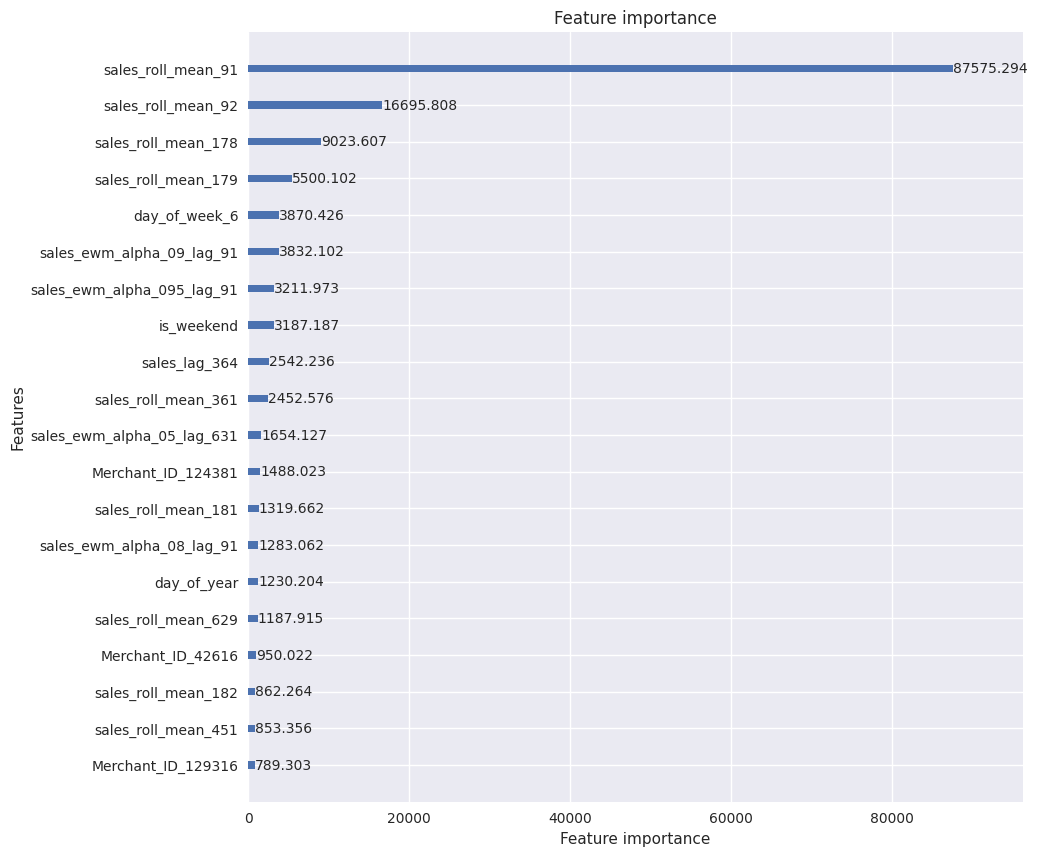

In [28]:
# Feature Importances

def plot_lgb_importances(model, plot=False, num=10):

    gain = model.feature_importance('gain')
    feat_imp = pd.DataFrame({'feature': model.feature_name(),
                             'split': model.feature_importance('split'),
                             'gain': 100 * gain / gain.sum()}).sort_values('gain', ascending=False)
    if plot:
        plt.figure(figsize=(10, 10))
        sns.set(font_scale=1)
        sns.barplot(x="gain", y="feature", data=feat_imp[0:25])
        plt.title('feature')
        plt.tight_layout()
        plt.show()
    else:
        print(feat_imp.head(num))


lgb.plot_importance(model, max_num_features=20, figsize=(10, 10), importance_type="gain")
plt.show();

<div style="background-color:#E0C1FF; border-radius: 4px; padding: 8px; margin-bottom: 6px; text-align: right;">
        <p style="margin: 0; text-align: left; font-weight:bold; font-size: 120%; font-family: Montserrat; letter-spacing: 1px; color: #404040;">In this project, a prediction system was built using LightGBM and XGBoost models, and the performance of the model was evaluated with the SMAPE metric. Thanks to these predictions:
</p>
    <blockquote style="border-left: 5px solid #26C6DA; padding-left: 10px;"> 
        <p style="margin: 0; text-align: left; font-weight:bold; font-size: 120%; font-family: Montserrat; letter-spacing: 1px; color: #404040;"> Potential increases and decreases in transaction volumes can be anticipated for merchants, enabling more efficient capacity and resource planning.</p>
        <p style="margin: 0; text-align: left; font-weight:bold; font-size: 120%; font-family: Montserrat; letter-spacing: 1px; color: #404040;"> Iyzico can make improvements based on the predictions to enhance the performance of its payment infrastructure, thereby improving both customer experience and operational efficiency.</p>
    </blockquote>
        <p style="margin: 0; text-align: left; font-weight:bold; font-size: 120%; font-family: Montserrat; letter-spacing: 1px; color: #404040;"> This type of predictive model will also be effective in detecting seasonal fluctuations and sudden changes.</p>
</div>

<div style="background-color: #FFD28A; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
        <p style="margin: 0; font-size: 20px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: black;">🌟 Thank you for taking the time to review my project. Your feedback and comments are extremely valuable for improving my projects.</p>
<p style="margin: 0; font-size: 12px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: black;"> Please feel free to share your thoughts and suggestions with me 💬</p>
</div>